In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy
import seaborn as sns

In [30]:
train_auc = pd.read_csv(os.path.join("curves", "AUC_train.csv"))
val_auc = pd.read_csv(os.path.join("curves", "AUC_val.csv"))
test_auc = pd.read_csv(os.path.join("curves", "AUC_test.csv"))

train_loss = pd.read_csv(os.path.join("curves", "loss_train.csv"))
val_loss = pd.read_csv(os.path.join("curves", "loss_val.csv"))
test_loss = pd.read_csv(os.path.join("curves", "loss_test.csv"))

In [37]:
def draw_curves(df, ylabel, title, filename):
    ax = sns.lineplot(data=df)
    ax.set(title=title, xlabel="epoch", xticks=[i for i in range(20)], ylabel=ylabel)
    fig = ax.get_figure()
    fig.savefig(os.path.join("..", "media", f"{filename}.png"))
    display(ax)

<Axes: title={'center': 'AUC Curves'}, xlabel='epoch', ylabel='AUC'>

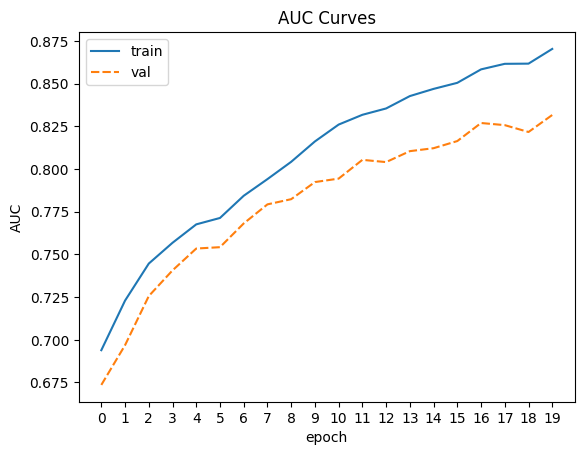

In [38]:
df = pd.DataFrame({
    "train": train_auc["Value"],
    "val": val_auc["Value"]
})

draw_curves(df, "AUC", "AUC Curves", "auc_curve_train_val")

<Axes: title={'center': 'AUC Curves'}, xlabel='epoch', ylabel='AUC'>

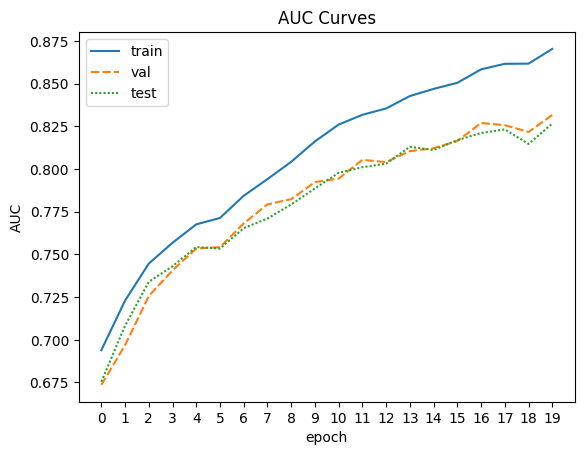

In [39]:
df2 = pd.DataFrame({
    "train": train_auc["Value"],
    "val": val_auc["Value"],
    "test": test_auc["Value"]
})

draw_curves(df2, "AUC", "AUC Curves", "auc_curve_train_val_test")

In [ ]:
df3 = pd.DataFrame({
    "train": train_loss["Value"],
    "val": val_loss["Value"]
})

draw_curves(df3, "loss", "Loss Curves", "loss_curve_train_val")

<Axes: title={'center': 'Loss Curves'}, xlabel='epoch', ylabel='loss'>

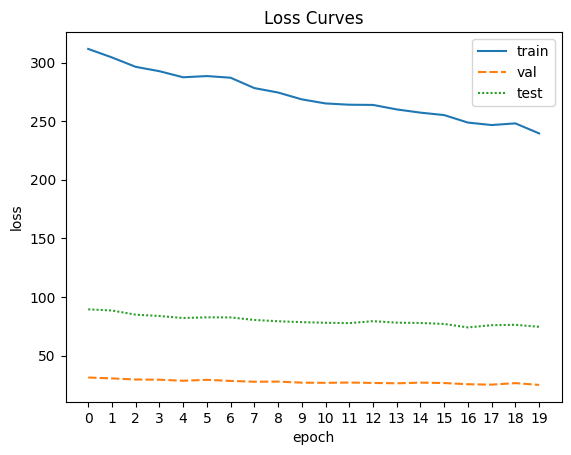

In [40]:
df4 = pd.DataFrame({
    "train": train_loss["Value"],
    "val": val_loss["Value"],
    "test": test_loss["Value"]
})

draw_curves(df4, "loss", "Loss Curves", "loss_curve_train_val_test")